In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [95]:
lm_results = pd.read_csv("data/results_LM.csv")
lm_results["forecast_error"] = lm_results.total_demand - lm_results.lm_prediction

sarima_results = pd.read_csv("data/results_SARIMA.csv")
sarima_results["forecast_error"] = sarima_results.total_demand - sarima_results.sarima_prediction

xgboost_results = pd.read_csv("data/results_XGBoost.csv")
xgboost_results["forecast_error"] = xgboost_results.total_demand - xgboost_results.xgb_prediction

decisionT_results = pd.read_csv('data/results_DecisionTree.csv')
decisionT_results["forecast_error"] = decisionT_results.total_demand - decisionT_results.model_prediction

In [122]:
results_all = {"Linear": lm_results, 
               "SARIMA": sarima_results, 
               "XGBoost": xgboost_results,
               "Decision Tree": decisionT_results}

colors = ['#1f77b4', '#ff7f0e', 'g', '#7f7f7f']

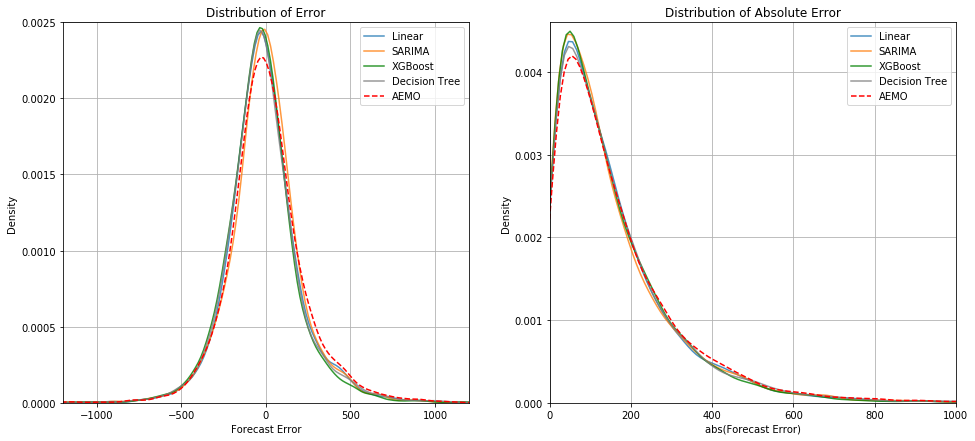

In [123]:
plt.subplots(1, 2, figsize = (16,7))

plt.subplot(1,2,1)
for i, model in enumerate(results_all):
    model_result = results_all[model]
    sns.kdeplot(model_result.forecast_error, label = model, color = colors[i], alpha = 0.8)
    
sns.kdeplot(lm_results.total_demand - lm_results.forecast_demand, label = "AEMO", color = 'r', ls = '--')
plt.xlim(-1200, 1200);
plt.ylim(0, 0.0025)
plt.xlabel('Forecast Error')
plt.grid()
plt.legend()
plt.title("Distribution of Error");

plt.subplot(1,2,2)
for i, model in enumerate(results_all):
    model_result = results_all[model]
    sns.kdeplot(abs(model_result.forecast_error), label = model, color = colors[i], alpha = 0.8)
    
sns.kdeplot(abs(lm_results.total_demand - lm_results.forecast_demand), label = "AEMO", color = 'r', ls = '--')
plt.xlim(0, 1000);
plt.ylim(0, 0.0046)
plt.grid()
plt.legend()
plt.xlabel('abs(Forecast Error)')
plt.title("Distribution of Absolute Error");